# 성적 분석

In [1]:
#python waring off
import warnings
warnings.filterwarnings('ignore')

#tensorflow waring off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df=pd.read_csv('datasets/score.csv')
df

,반,이름,국어,영어,수학,과학
0,1,성춘향,67,87,90,98
1,1,이몽룡,45,45,56,98
2,1,향단이,95,59,96,88
3,1,방자,65,94,89,98
4,1,월매,45,65,78,98
5,1,변학도,78,76,98,89
6,2,홍길동,87,67,65,56
7,2,임꺽정,89,98,78,78
8,2,전우치,100,78,56,65
9,2,일지매,99,89,87,87


In [4]:
subjects=['국어','영어','수학','과학']
#총점이라는 것을 넣고싶음

In [5]:
df['총점']=df[subjects].sum(axis=1)
df

,반,이름,국어,영어,수학,과학,총점
0,1,성춘향,67,87,90,98,342
1,1,이몽룡,45,45,56,98,244
2,1,향단이,95,59,96,88,338
3,1,방자,65,94,89,98,346
4,1,월매,45,65,78,98,286
5,1,변학도,78,76,98,89,341
6,2,홍길동,87,67,65,56,275
7,2,임꺽정,89,98,78,78,343
8,2,전우치,100,78,56,65,299
9,2,일지매,99,89,87,87,362


In [6]:
#평균구해보기
df['평균']=df['총점']/len(subjects) #4는 변할 수 있으므로!
df

,반,이름,국어,영어,수학,과학,총점,평균
0,1,성춘향,67,87,90,98,342,85.50
1,1,이몽룡,45,45,56,98,244,61.00
2,1,향단이,95,59,96,88,338,84.50
3,1,방자,65,94,89,98,346,86.50
4,1,월매,45,65,78,98,286,71.50
5,1,변학도,78,76,98,89,341,85.25
6,2,홍길동,87,67,65,56,275,68.75
7,2,임꺽정,89,98,78,78,343,85.75
8,2,전우치,100,78,56,65,299,74.75
9,2,일지매,99,89,87,87,362,90.50


In [7]:
#잘하는 사람부터 내림차순 정리, 평균과 이름으로 정리
df2=df.sort_values(['평균','이름'],ascending=[False,True])
#평균내림차순, 이름 오름차순
df2
#엑셀 계산기능을 굳이 안해도 되는 것처럼 보임

,반,이름,국어,영어,수학,과학,총점,평균
9,2,일지매,99,89,87,87,362,90.50
3,1,방자,65,94,89,98,346,86.50
7,2,임꺽정,89,98,78,78,343,85.75
0,1,성춘향,67,87,90,98,342,85.50
5,1,변학도,78,76,98,89,341,85.25
2,1,향단이,95,59,96,88,338,84.50
11,2,콩쥐,65,89,87,78,319,79.75
8,2,전우치,100,78,56,65,299,74.75
4,1,월매,45,65,78,98,286,71.50
6,2,홍길동,87,67,65,56,275,68.75


> 한글 깨지는 문제 해결하기

In [8]:
#matpoltlib 한글 깨짐 방지
import platform
platform.system()
#플랫폼에 따른 한글 설정 방법

'Windows'

In [9]:
import matplotlib
if platform.system()=='Windows':
    matplotlib.rc('font', family='Malgun Gothic')
    
elif platform.system()=='Darwin': #Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='ManumGothic')
plt.rcParams['axes.unicode_minus']=False #마이너스 기호 깨짐 방지

> 그래프 그리는 코드

In [10]:
sorted_df=df.sort_values(['평균'], ascending=[False])

In [11]:
sorted_df

,반,이름,국어,영어,수학,과학,총점,평균
9,2,일지매,99,89,87,87,362,90.50
3,1,방자,65,94,89,98,346,86.50
7,2,임꺽정,89,98,78,78,343,85.75
0,1,성춘향,67,87,90,98,342,85.50
5,1,변학도,78,76,98,89,341,85.25
2,1,향단이,95,59,96,88,338,84.50
11,2,콩쥐,65,89,87,78,319,79.75
8,2,전우치,100,78,56,65,299,74.75
4,1,월매,45,65,78,98,286,71.50
6,2,홍길동,87,67,65,56,275,68.75


In [12]:
sorted_df.index=sorted_df['이름'] #indx를이름으로 바꿈

In [13]:
sorted_df

,반,이름,국어,영어,수학,과학,총점,평균
이름,,,,,,,,
일지매,2,일지매,99,89,87,87,362,90.50
방자,1,방자,65,94,89,98,346,86.50
임꺽정,2,임꺽정,89,98,78,78,343,85.75
성춘향,1,성춘향,67,87,90,98,342,85.50
변학도,1,변학도,78,76,98,89,341,85.25
향단이,1,향단이,95,59,96,88,338,84.50
콩쥐,2,콩쥐,65,89,87,78,319,79.75
전우치,2,전우치,100,78,56,65,299,74.75
월매,1,월매,45,65,78,98,286,71.50


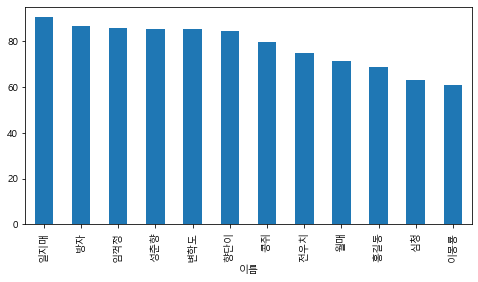

In [14]:
sorted_df['평균'].plot(kind='bar',figsize=(8,4))
#한글설정 해서 이렇게 깔끔하게 나오는거

In [15]:
#메모리상에 있는 데잍처를 엑셀 파일로 저장
sorted_df.to_excel('sorted_score.xlsx')

### 앞으로는 단순히 엑셀 말고도 이렇게 pandas를 이용한 분석이 중요시 될 것

> 반 별 점수비교

In [16]:
일반=df[df['반']==1] #반이 1인 친구가 true가 되어서 true만 걸러내어 1반인 학생만 표시
일반

,반,이름,국어,영어,수학,과학,총점,평균
0,1,성춘향,67,87,90,98,342,85.50
1,1,이몽룡,45,45,56,98,244,61.00
2,1,향단이,95,59,96,88,338,84.50
3,1,방자,65,94,89,98,346,86.50
4,1,월매,45,65,78,98,286,71.50
5,1,변학도,78,76,98,89,341,85.25


In [17]:
이반=df[df['반']==2] #반이 1인 친구가 true가 되어서 true만 걸러내어 1반인 학생만 표시
이반

,반,이름,국어,영어,수학,과학,총점,평균
6,2,홍길동,87,67,65,56,275,68.75
7,2,임꺽정,89,98,78,78,343,85.75
8,2,전우치,100,78,56,65,299,74.75
9,2,일지매,99,89,87,87,362,90.50
10,2,심청,98,45,56,54,253,63.25
11,2,콩쥐,65,89,87,78,319,79.75


In [18]:
일반['평균']

0    85.50
1    61.00
2    84.50
3    86.50
4    71.50
5    85.25
Name: 평균, dtype: float64

In [19]:
#반 별 평균 비교

일반평균=일반['평균'].sum()/len(일반)
일반평균

79.04166666666667

In [20]:
이반평균=이반['평균'].sum()/len(이반)
이반평균

77.125

## T-test

In [21]:
stats.ttest_ind(일반['평균'],이반['평균']) #독립적인 두 집단의 차이를 구하는 것
#pvalue=0.755583336185639, 기준: 0.05 
#영가설(상식)과 대립가설(연구자가 증명하고 싶은 가설)
#세상에나 spss에 했던 거잖아~~!!!

Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)

In [22]:
for subject in subjects: #기준: 0.05
    print(stats.ttest_ind(일반[subject],이반[subject]))
    
#Ttest_indResult( pvalue=0.031982494983816424) #국어, 차이있음
#Ttest_indResult( pvalue=0.5518533781528807) #영어, 차이 ㄴ
#Ttest_indResult( pvalue=0.1654958420079056) #수학, 차이 없음
#Ttest_indResult(pvalue=0.0014931977711732465) #과학. 차이 있음

Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


In [23]:
일반['과학'].sum()/len(일반), 이반['과학'].sum()/len(이반)

(94.83333333333333, 69.66666666666667)

## 그래프 그리기

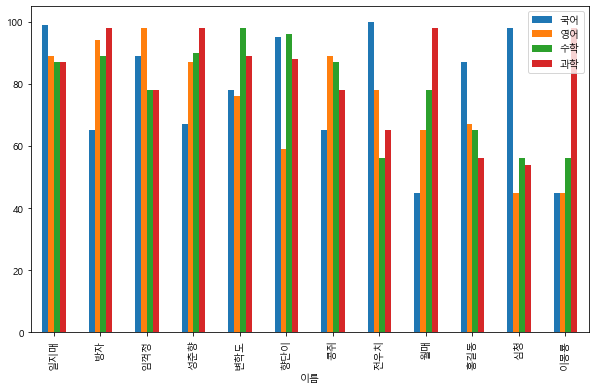

In [24]:
sorted_df[subjects].plot(kind='bar',figsize=(10,6))

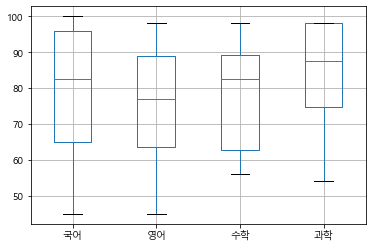

In [25]:
df[subjects].boxplot()
#국어랑 과학은 잘보고 영어랑 수학은 못봤네

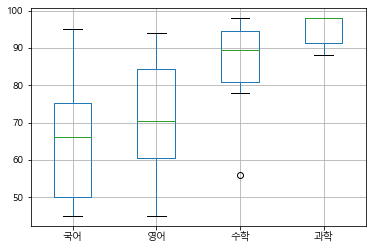

In [26]:
일반[subjects].boxplot()
#국어랑 영어는 낮지만 수학과 과학은 높네~ 이과인가?

이상치(동그라미)는 버리고 범위 안에 있는 애들만 선택

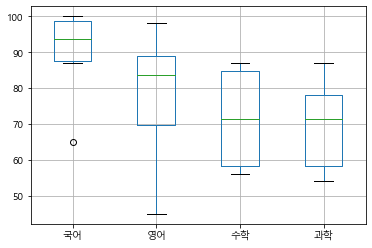

In [27]:
이반[subjects].boxplot()

## 피어쓴 상관계수
두 과목 사이의 상관관계가 있는지

In [28]:
stats.pearsonr(df['수학'],df['과학'])
#뒤에 있는게 P값
#0.056505804861555285-> 0.05 와 애매하게 큼. 차이가 조금 있긴 있음,경게선에...

(0.5632890597067751, 0.056505804861555285)

In [29]:
stats.pearsonr(df['국어'],df['영어'])
#0.7437959551857833 -> 차이가 없다.

(0.10566562777974003, 0.7437959551857833)

# PANDAS

In [30]:
import pandas as pd

> 버젼 체크하기: 공부할 때는 가상환경 비슷하게 하기 위해 버젼을 꼭 체크해야 함

In [31]:
pd.__version__

'1.0.5'

## Series

In [32]:
s = pd.Series([1,2,3,4]) 
s #이렇게 생김
#왼쪽에 인덱스 있고 인덱스의 디폴트가 숫자임.
#리스트랑 유사하나 시리즈는 인덱스를 문자로 바꿀 수 있음.

0    1
1    2
2    3
3    4
dtype: int64

In [33]:
s[1]
s

0    1
1    2
2    3
3    4
dtype: int64

In [34]:
s[[1,3]] #index

1    2
3    4
dtype: int64

> Series 의 인덱스 변경하기

In [35]:
s=pd.Series([1,2,3,4], index=['a','b','c','d'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [36]:
s[['a','d']]

a    1
d    4
dtype: int64

### 데이터 프레임
다양한 자료형을 가지고 pandas의 데이터 프레임으로 변경 가능

In [37]:
temp_df=pd.DataFrame({'name':['김','이','박'],'age':[25,35,45]})
temp_df


,name,age
0,김,25
1,이,35
2,박,45


In [38]:
temp_df['age'].sum()

105

In [39]:
s1=temp_df['name']
print(type(s1))
s1

<class 'pandas.core.series.Series'>


0    김
1    이
2    박
Name: name, dtype: object

In [40]:
len(s1) #함수의 코드. 명령어가 바로 나오고 그 안에 목적어

3

In [41]:
s1.size

3

### 시리즈의 함수형 언어와 객체지향 언어
1. 함수형 언어: 함수, 명령어, open the door, 명사와 동사가 따로


- 함수 사용 시: **동사(목적어)**


2. 객체지향 언어:객체=명사+동사, 명사와 동사가 합쳐져 있는것


- IT= 저장+처리(언어로)

- 언어=속성(변수:명사+함수:동사)+행동

- 객체 지향 사용 시: **객체. 메소드(파라미터)**

    예) 주어. 동사(목적어)

### 시각화

In [42]:
import seaborn as sns

In [43]:
anscombe=sns.load_dataset('anscombe')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

# 여기왜이레

In [45]:
dataset_1=anscombe[anscombe['dataset']=='I'] #I과 일치하는 애가 True가 나오고 참인것만 표시됨
dataset_1
#잘 되어가고있는지 궁금하면 끊어서 하나하나씩

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


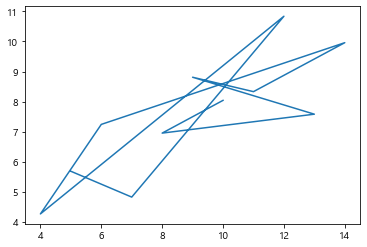

In [46]:
plt.plot(dataset_1['x'],dataset_1['y'])

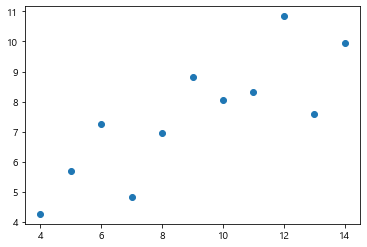

In [47]:
plt.plot(dataset_1['x'],dataset_1['y'],'o') #동그란 모형

In [48]:
dataset_2=anscombe[anscombe['dataset']=='II']
dataset_3=anscombe[anscombe['dataset']=='III']
dataset_4=anscombe[anscombe['dataset']=='IV']

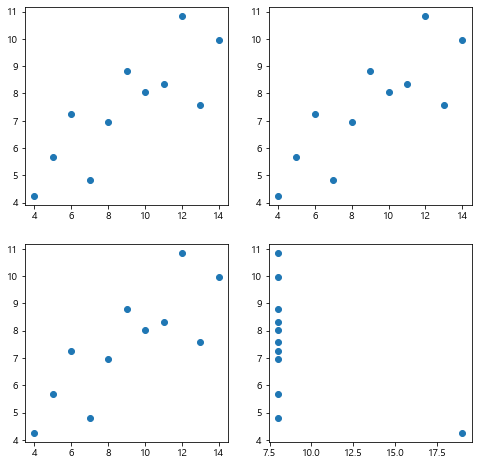

In [49]:
plt.figure(figsize=(8,8))

plt.subplot(221)
plt.plot(dataset_1['x'],dataset_1['y'],'o')

plt.subplot(222)
plt.plot(dataset_2['x'],dataset_1['y'],'o')

plt.subplot(223)
plt.plot(dataset_3['x'],dataset_1['y'],'o')

plt.subplot(224)
plt.plot(dataset_4['x'],dataset_1['y'],'o')


In [50]:
dataset_1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [51]:
dataset_2.describe() 

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


> 1과 2를 describe를 이용해서 같다고 하더라도 시각화하면 다르다. 그러므로 시각화는 중요하다

In [52]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- 연속형 데이터(실수, 정수):
- 범주형 데이터: 순서가 있느냐

=> 각각 어떤 그래프를 그려야 이해하기 좋은지

In [53]:
type(tips)

pandas.core.frame.DataFrame

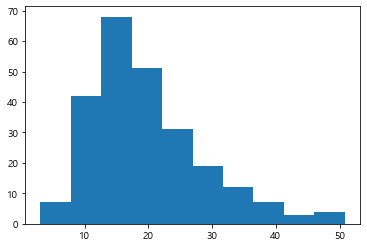

In [54]:
#금액별로몇 명 있는지 히스토그램
plt.hist(tips['total_bill'],bins=10)
plt.show()

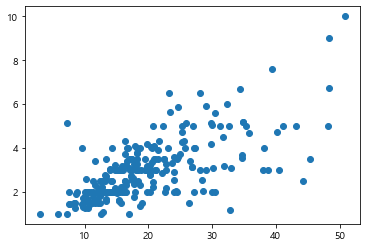

In [55]:
plt.scatter(tips['total_bill'],tips['tip']) #순서대로 첫번쩨가 x
#연속된 데이터 2개를 X축과 Y축으로 표현. 그림을 보니 경향성을 보임
#연속형 데이터는 scatter를 쓰면 좋다

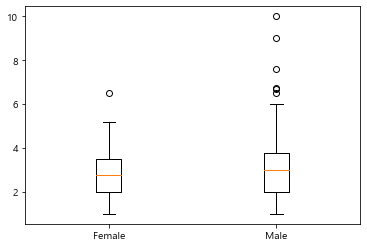

In [56]:
#boxplot: 데이터의 분포를 볼 때 좋음
#중첩 푼거 했ㅇ름
plt.boxplot([tips[tips['sex']=='Female']['tip'],
             tips[tips['sex']=='Male']['tip']],
            labels=['Female','Male'])
plt.show()
#이상치가 있을 때, 이상치를 버리는게 바람직함
#데이터에다가 로그를 하고....뭐 그러는 방법이 있음.
#이상치가 많으면 이상치에 대한 생각을 해보아야 함
#남성은 기분파로 팁을 주는 경향이 있음

In [59]:
def recode_sex(sex):
    if sex=='Female':
        return 0
    else:
        return 1

In [77]:
tips['sex_color']=tips['sex'].apply(recode_sex) # 씨리즈가 갖고 잇는 메소드 중에 apply
#tips의 성별에 대해서 이 함수를 적용하라는 뜻. 여자는 0이되고 남자는 1이되고
#함수를 잘 만들면 좋음.
tips.head()
#apply같은 함수를 고차함수라고 함

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


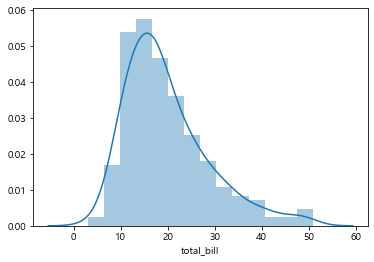

In [78]:
sns.distplot(tips['total_bill']) #히스토그램에 정규분포선이 그려짐

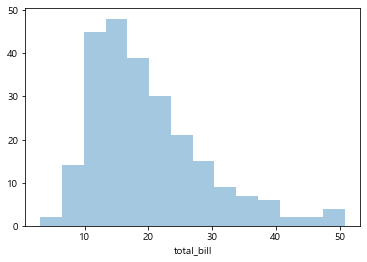

In [80]:
sns.distplot(tips['total_bill'],kde=False) #선 없애는 것

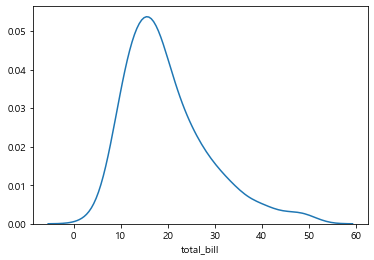

In [81]:
sns.distplot(tips['total_bill'],hist=False) #정규 분포 선만 알고싶다.

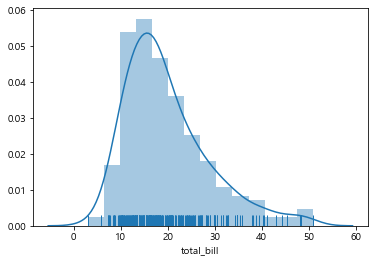

In [84]:
#맨 아래쪽에 얼만큼 데이터가 잇는지 표시해주는 것
sns.distplot(tips['total_bill'],rug=True)
#진하게 되어있을수록 데이터가 많음. 데이터의 조밀도 정보
#교수님이 새로운 그래프를 좋아한다면~~~

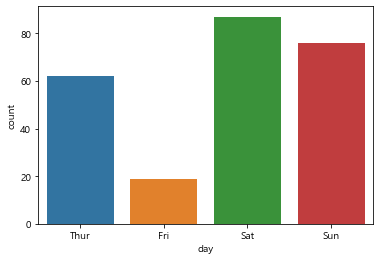

In [86]:
sns.countplot('day',data=tips) #요일별 손님 수를 세주는거야

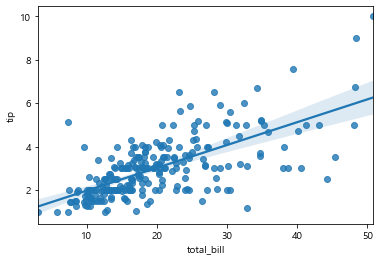

In [87]:
sns.regplot(x='total_bill',y='tip',data=tips)
#회귀분석하는 그림. 데이터의 경향을 확인하는데 도움. 

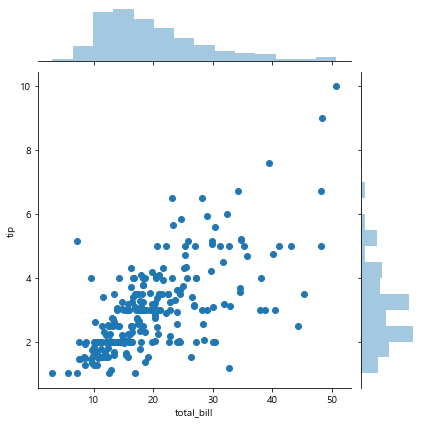

In [88]:
sns.jointplot(x='total_bill',y='tip', data=tips)
# 방향별로 데이터가 얼만큼 있는지 

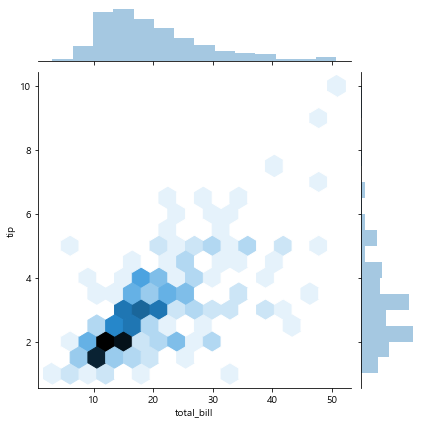

In [89]:
#점 대신에 육각형 형태로 그려주는 옵션
sns.jointplot(x='total_bill',y='tip', data=tips,kind='hex')
#시각화해서 더 잘 표현됨

### *spark: 빅데이터 처리 알고리즘

# 빅데이터에 중요한 map과 reduce
map은 하나씩 처리하고 reduce는 줄인다

## map

In [71]:
arr=['10','20','30'] #==> 원하는 최종 결과 [10,20,30]
arr2=[]
for i in arr:
    arr2.append(int(i))
    
arr2

[10, 20, 30]

In [72]:
#map 이용
arr3=map(int,arr)
list(arr3) #메모리에만 존재하고 실행되진 ㅇ낳음

[10, 20, 30]

In [73]:
arr3=list(map(int,arr)) # arr을 가지고 숫자로 바꿔라.
arr3

[10, 20, 30]

In [74]:
#숫자로 되어있는 리스트를 문자로 바꾸기
s1=[1,2,3]
s2=list(map(str,s1))
s2

['1', '2', '3']

## reduce

In [75]:
from functools import reduce

In [76]:
arr=range(1,11)
hap=reduce(lambda a,b:a+b,arr) #shift+tab으로 함수 parameter 알 수 있음.
hap
#람다: a,b 두개 들어가서 둘이 덧셈되는게 리턴. :은 함수 이름 옆에 있는거임.

55